# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
df= pd.read_csv('used_device_data.csv')

## Data Overview

The initial steps to get an overview of any dataset is to:

* observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not

* get information about the number of rows and columns in the dataset

* find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

* check the statistical summary of the dataset to get an overview of the numerical columns of the data

**Displaying the first few rows of the datase**

In [3]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


* The dataset contains information about different features of used the phone/tablets.


**Checking the shape of the dataset**

In [4]:
df.shape

(3454, 15)

* The dataset contains information (15 attributes) about 3454 phone/tablets.

**Checking the data types of the columns for the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (float and int type) and 4 string (object type) columns in the data.
* The target variable is normalized used price , which is of float type.

**Checking for duplicate values**

In [6]:
df.duplicated().sum()

0

* There are no duplicated values in the data.

**Checking for missing values**

In [7]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in many columns.

**Statistical summary of the dataset**

In [8]:
df.describe(include='all')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


* We can see that the normalised used price vary between 1.5 and 6.6.
* The general normalised used price is 4.36
* Android is the most occuring type of operating system.
* The devices released year are between 2015 and 2020.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**Univariate Analysis**

In [9]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

normalized_used_price

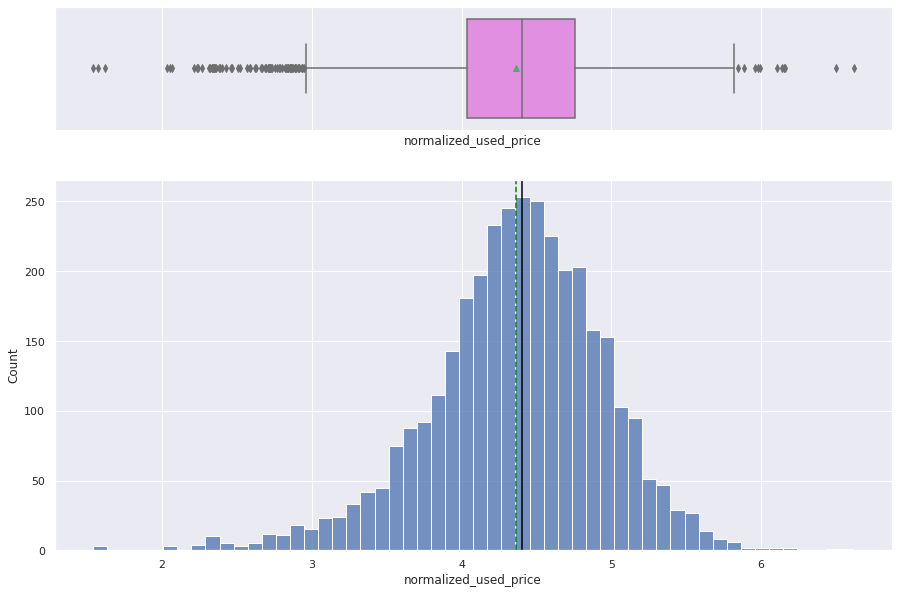

In [11]:
histogram_boxplot(df, "normalized_used_price")

* Normalized used price is kind of normally distributed with much skewed tails.

normalized_new_price

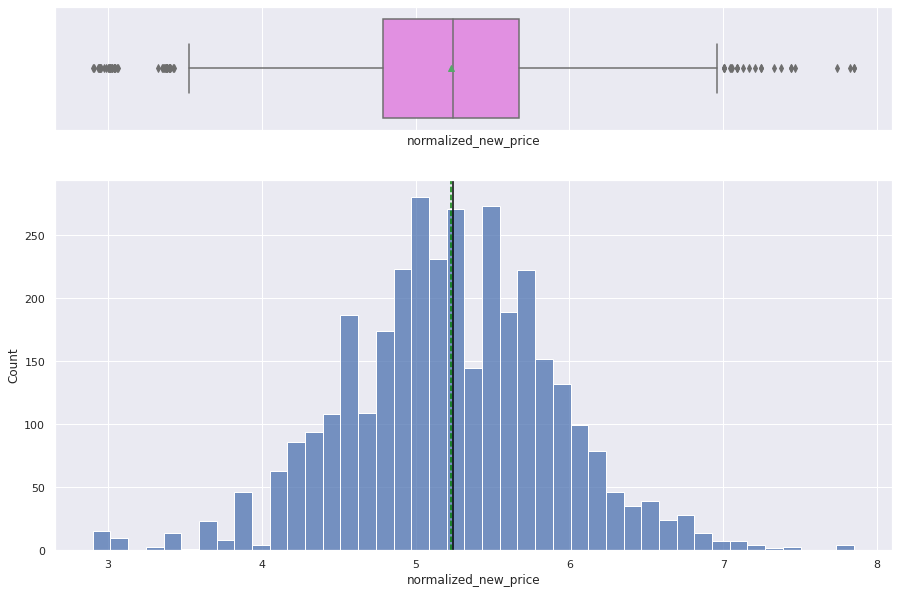

In [12]:
histogram_boxplot(df, "normalized_new_price")

* Normalized new price is kind of normally distributed with much skewed tails.

days_used 

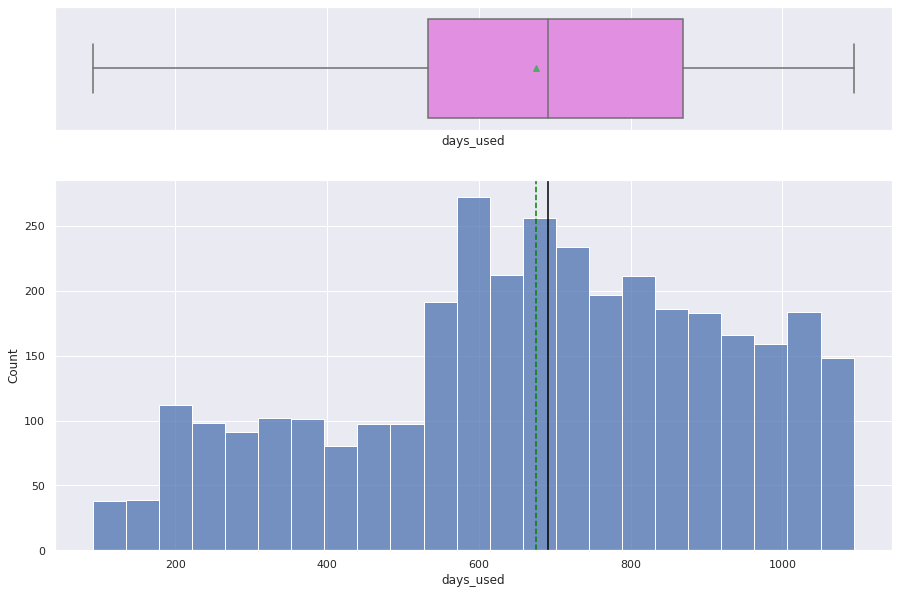

In [13]:
histogram_boxplot(df, "days_used")

* 50% of the devices were used less than 650 days.
* The dataset contains a wide range of used devices.

weight

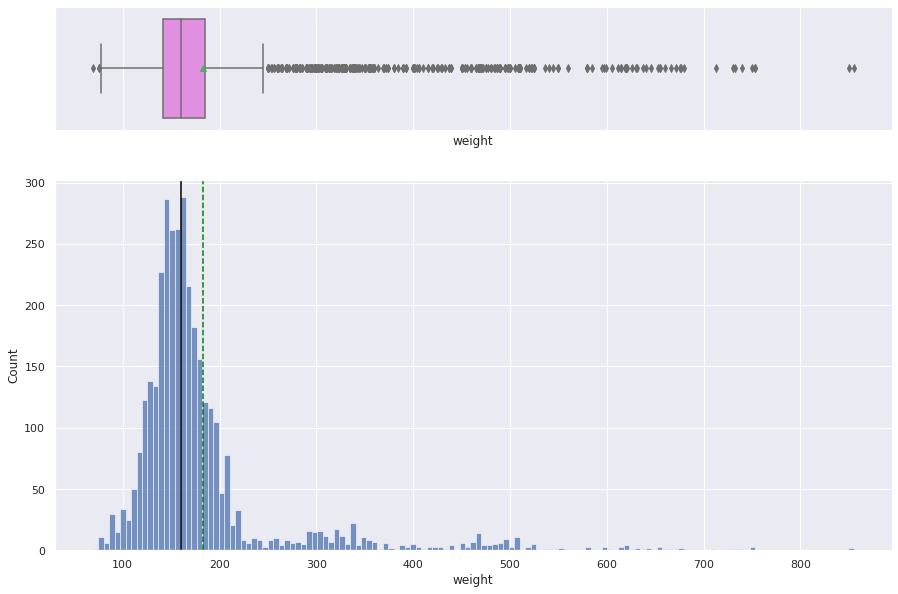

In [14]:
histogram_boxplot(df, "weight")

* The weight distribution is right skewed , seems to have much outilers in the data.

battery

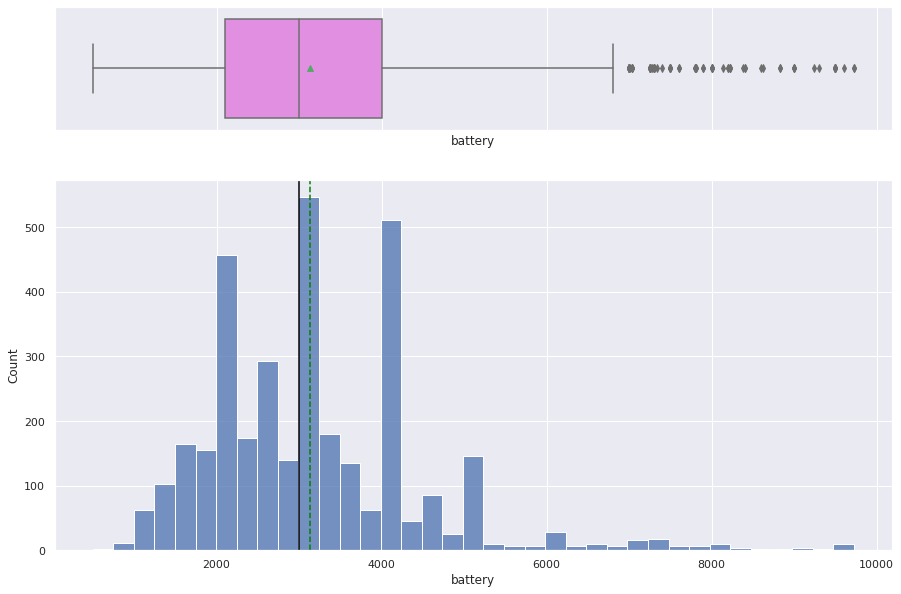

In [15]:
histogram_boxplot(df, "battery")

* 75% of the devices have battery capacity less than 4000 mAh
* There are 3 spikes between 2000 and 4000 in the histogram,indicating that there are batteries which have been often used alot. 

ram

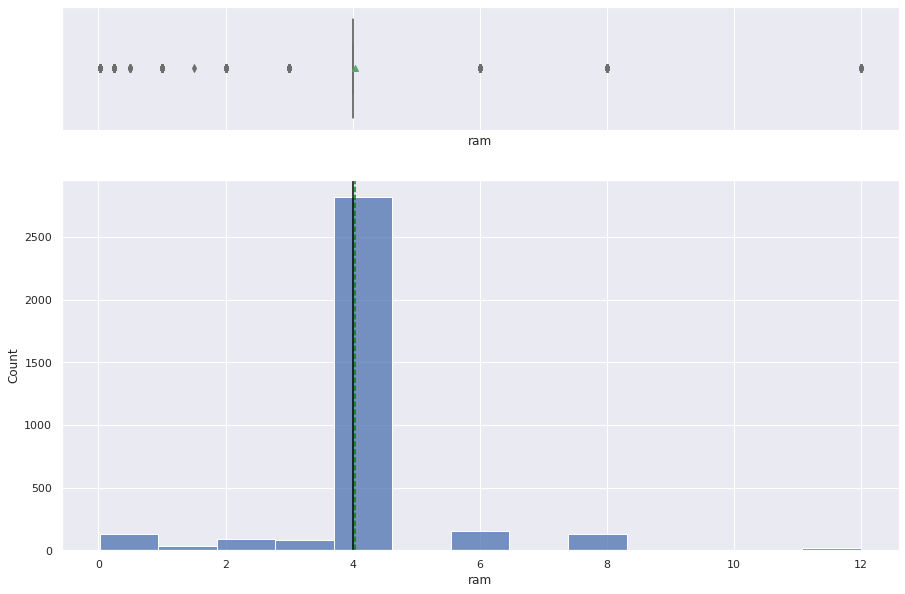

In [16]:
histogram_boxplot(df, "ram")

* Ram distribution has a spike at 4GB , more than 2500 devices have 4GB ram.

int_memory

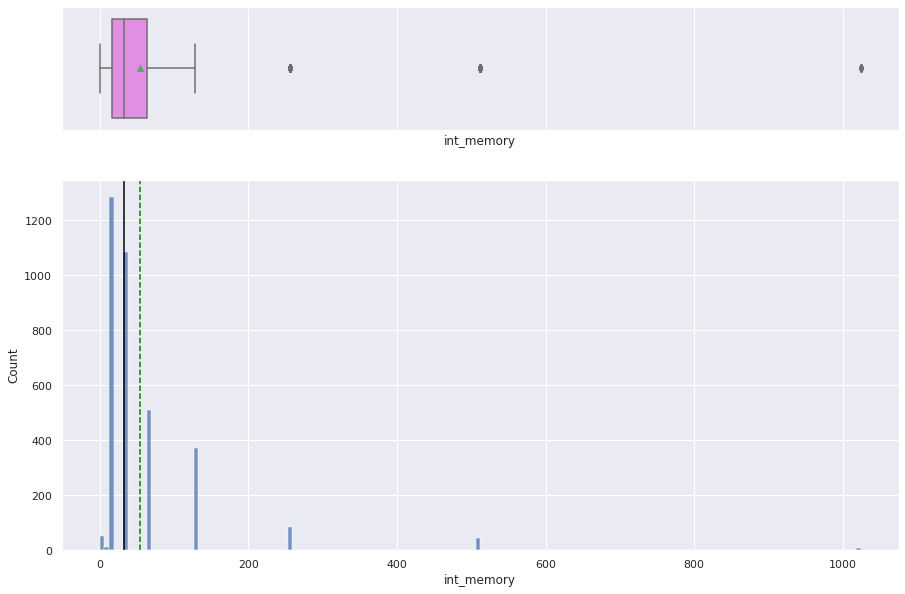

In [17]:
histogram_boxplot(df, "int_memory")

* The distribution shows a mean internal memory of approximately 50 GB.

selfie_camera_mp

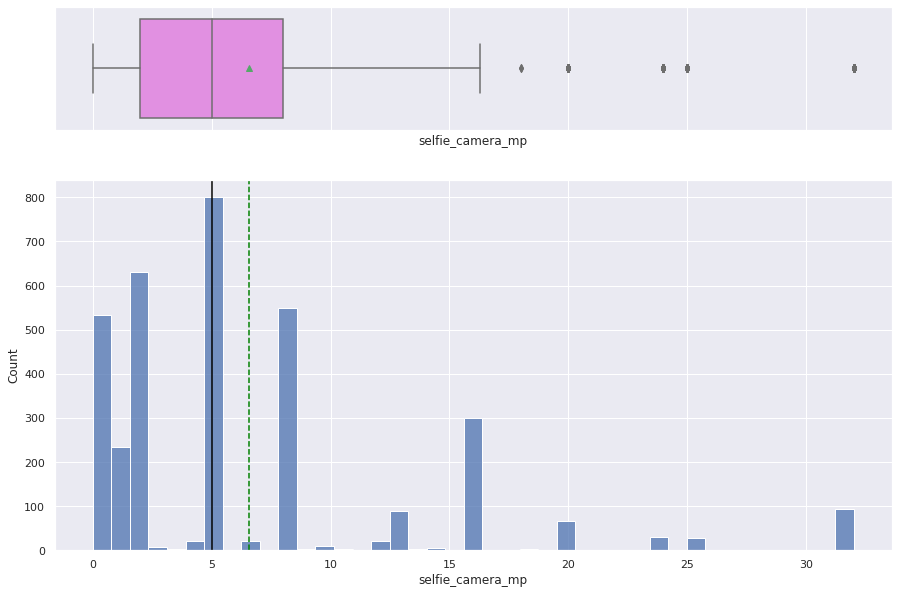

In [18]:
histogram_boxplot(df, "selfie_camera_mp")

* The distribution shows a variety of selfie camera resolution ,however 50% of the devices are less than 5MP.

main_camera_mp

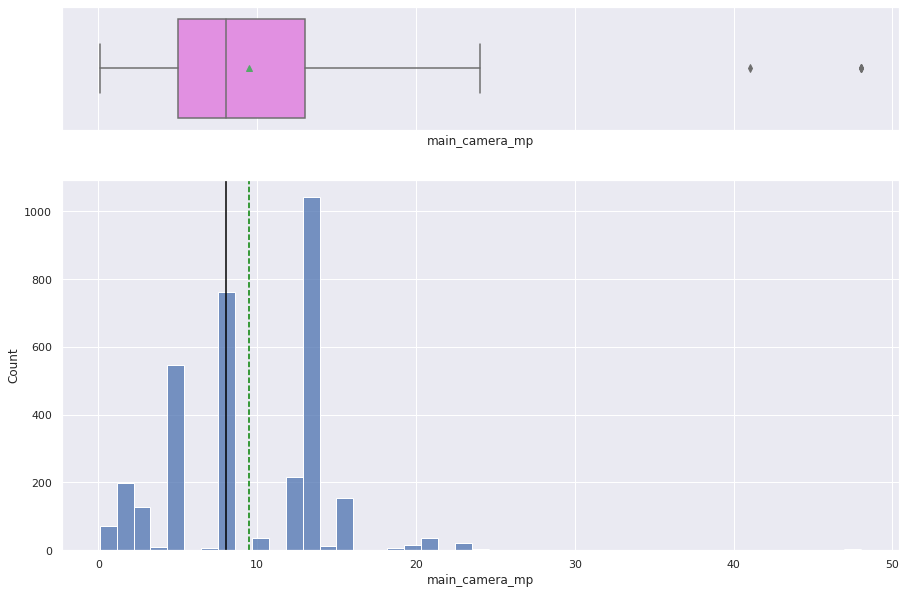

In [19]:
histogram_boxplot(df, "main_camera_mp")

* The distribution shows a variety of main camera resolution ,however 50% of the devices are less than 10MP.
* There is a spike at ~13MP in the histogram, indicating that there are devices which have good main camera alot.

screen_size

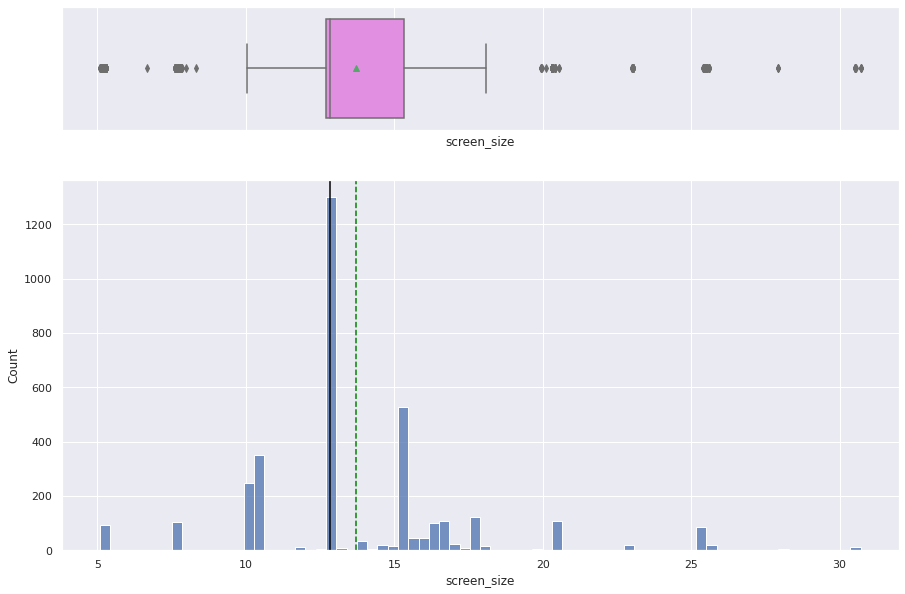

In [20]:
histogram_boxplot(df, "screen_size")

* The distribution shows that more than 1200 devices have screen size less than 12 inch.

5g

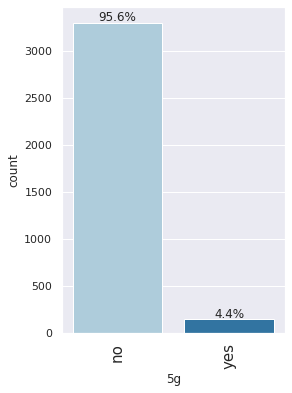

In [21]:
labeled_barplot(df, '5g', perc=True, n=None)

* 95.6% of the devices don't support the 5g network.

4g

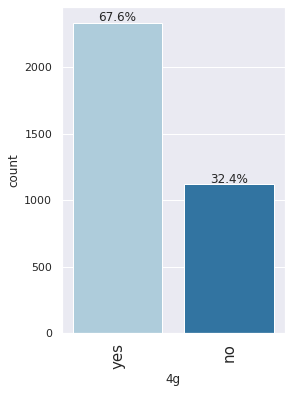

In [22]:
labeled_barplot(df, '4g', perc=True, n=None)

* 67.6 % of the devices support 4g network.

os

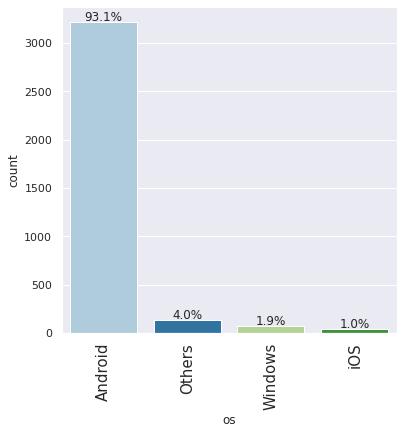

In [23]:
labeled_barplot(df, 'os', perc=True, n=None)

* 93% of the devices are opereated by android system.

brand_name

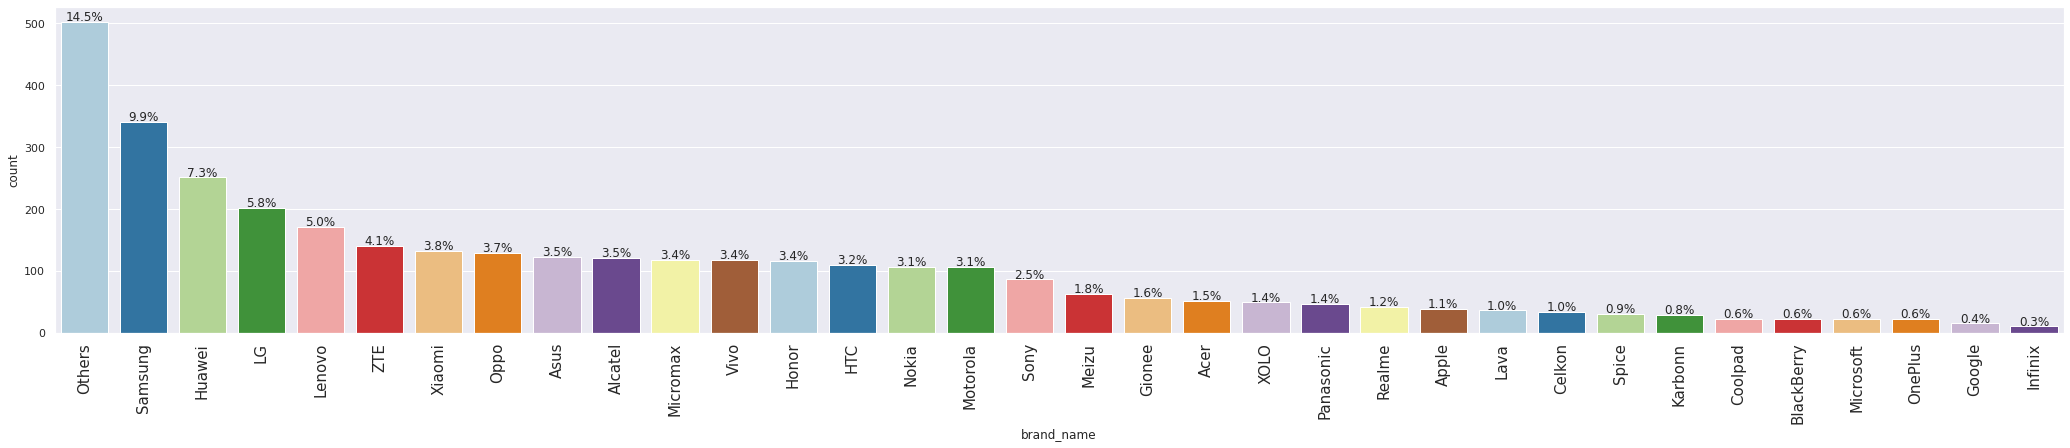

In [24]:
labeled_barplot(df, 'brand_name', perc=True, n=None)

* The distribution shows that the data has 15% of devices are unknown brands,

although the top 3 brands in the used market are: Samsung, Huawei and LG.

**What does the distribution of normalized used device prices look like?**

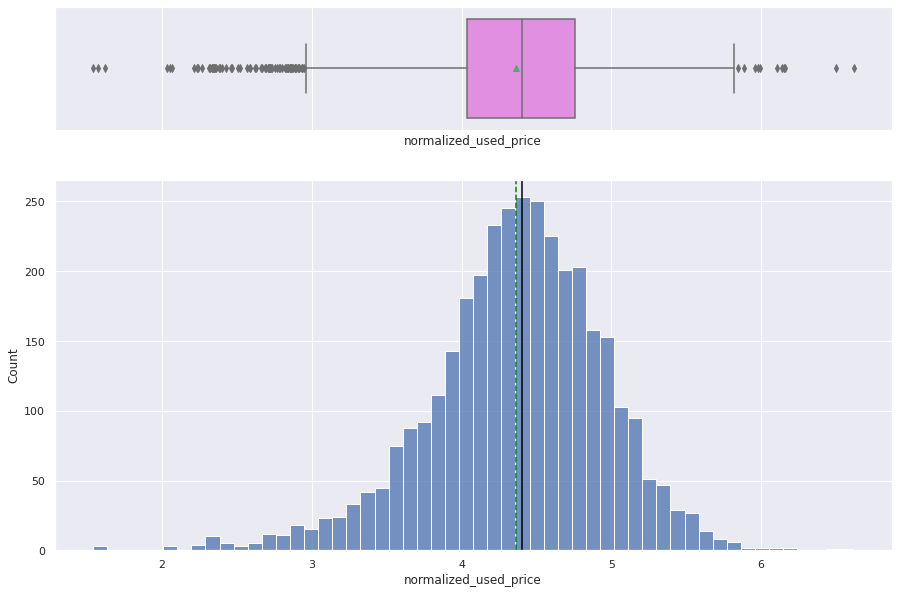

In [25]:
histogram_boxplot(df, "normalized_used_price")

* Normalized used price is kind of normally distributed with much skewed tails.

What percentage of the used device market is dominated by Android devices?

In [26]:
df_android= df[df['os']=='Android']

In [27]:
df_android.shape[0]/df.shape[0]*100

93.05153445280834

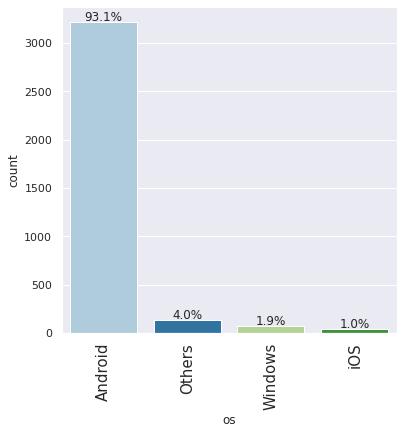

In [28]:
labeled_barplot(df, 'os', perc=True, n=None)

* 93.1% of the used devices are operated by Android operating system.

**Bivariate Analysis**

The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

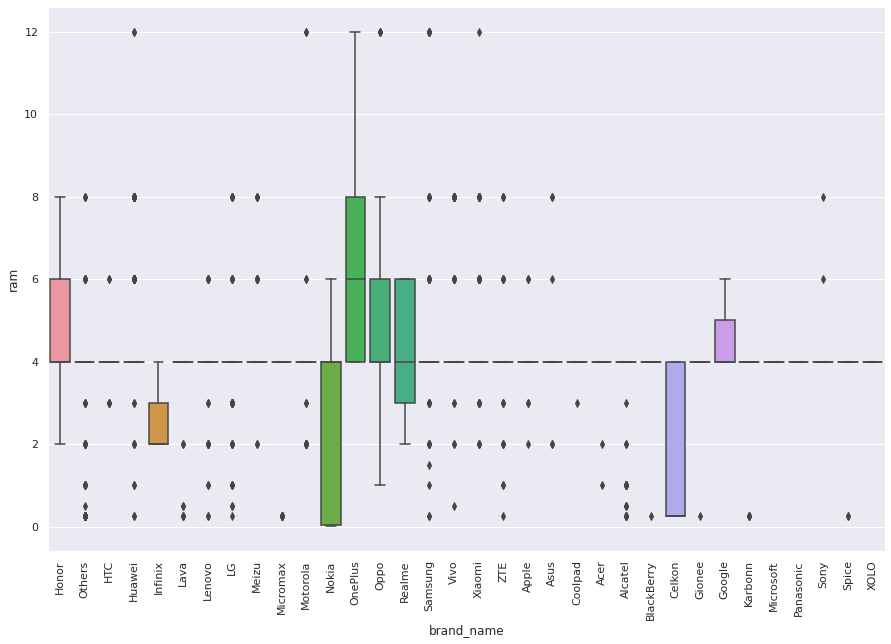

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df , x='brand_name', y='ram')
plt.xticks(rotation=90);

* Some brands like Nokia,one plus,oppo and realme have a variety of devices with different ram capacity in the used market.

A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [30]:
df_battery= df[df['battery']> 4500.0]

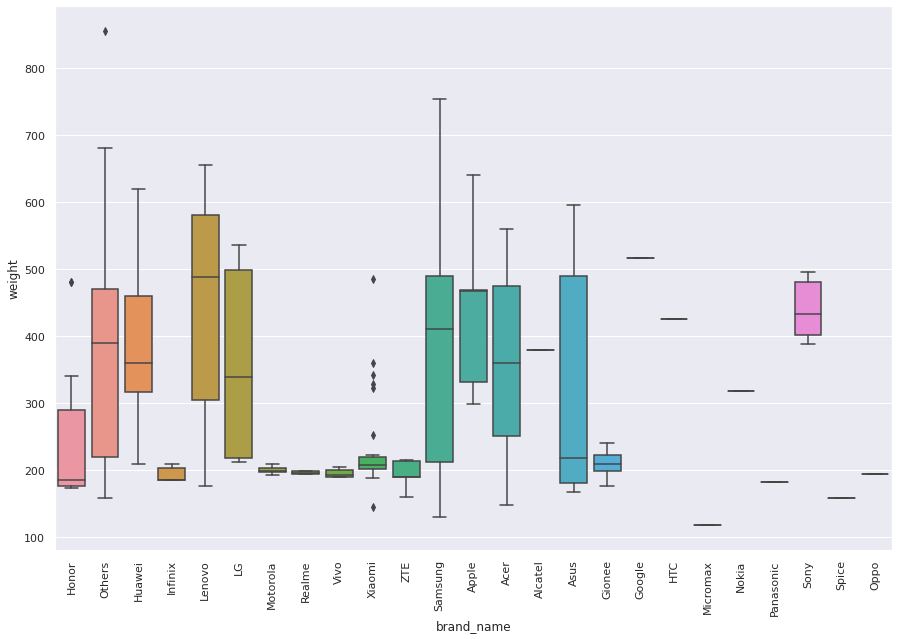

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_battery, x='brand_name',y='weight')
plt.xticks(rotation=90)
plt.show();

* Some brands have devices with battery capacity more than 4500 mAh but with different weight ranges.
* The average weight in many brands for batteries more than 4500 mAh is approximatly 300 grams.

Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [32]:
df_large= df[df['screen_size'] > 6.0]

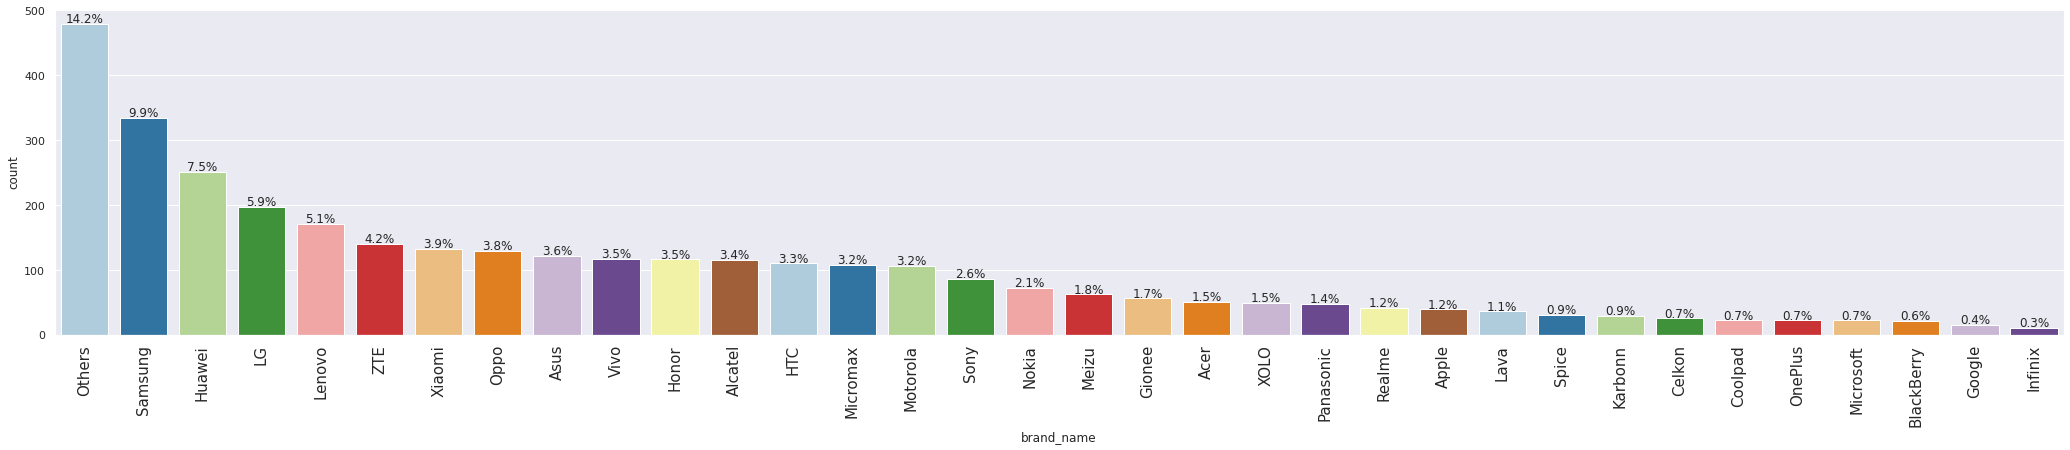

In [33]:
labeled_barplot(df_large, "brand_name", perc=True)

* In the range higher than 6 inch screen size; Samsung, Huawei, LG and Lenovo present the highest used devices in the dataset.

A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [34]:
df_8MP = df[df['selfie_camera_mp'] > 8.0]

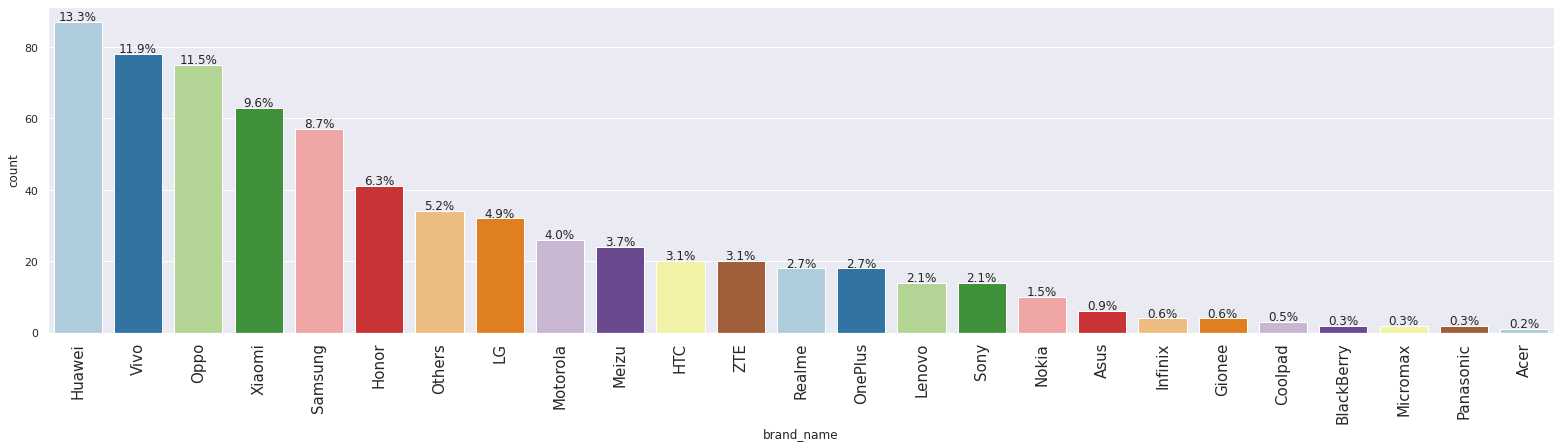

In [35]:
labeled_barplot(df_8MP, "brand_name", perc=True)

* The distribution shows that Huawei, Vivo and Oppo present a great amount of devices that offer selfie camera greater than 8 MP in the dataset.

Rear cameras generally have a better resolution than front cameras,  What is the distribution of devices offering greater than 16MP main cameras across brands?

In [36]:
df_16mp= df[df['main_camera_mp']> 16]

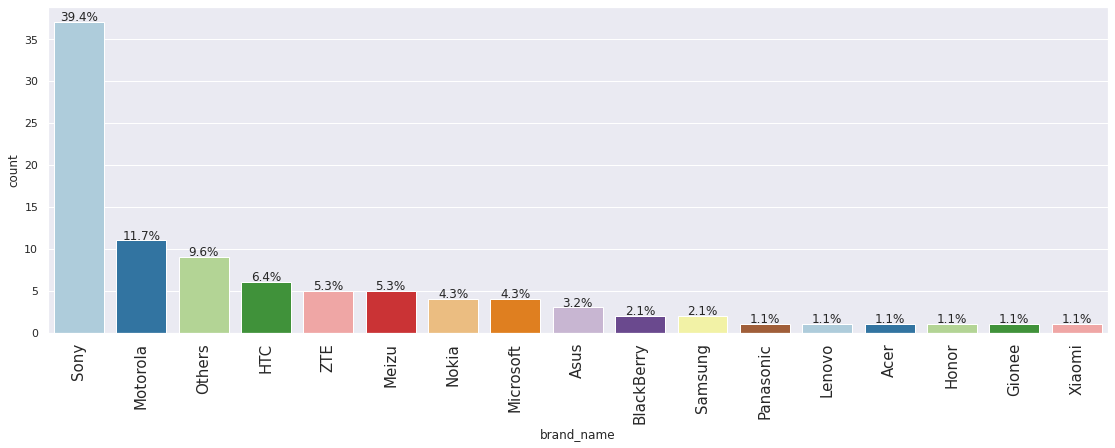

In [37]:
labeled_barplot(df_16mp, "brand_name", perc=True)

* The graph shows Sony has 39% of devices that have great main camera resolution higher than 16 MP in the dataset.


How does the price of used devices varies across the years?

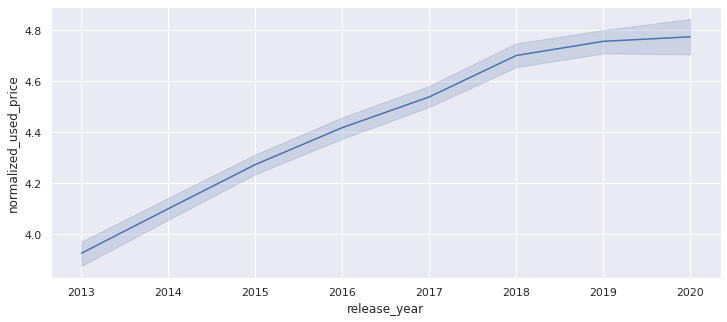

In [38]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df,x='release_year',y='normalized_used_price') 
plt.show()

* The distribution shows that the price of used devices increased over the years.

How the prices vary for used phones and tablets offering 4G and 5G networks?

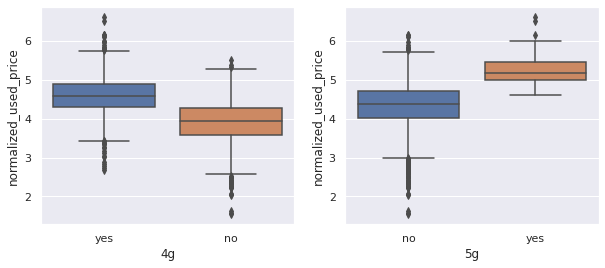

In [39]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

* Graph shows that devices covering 5G network are more expensive than devices covering 4G network.

Which attributes are highly correlated with the normalized price of a used device?

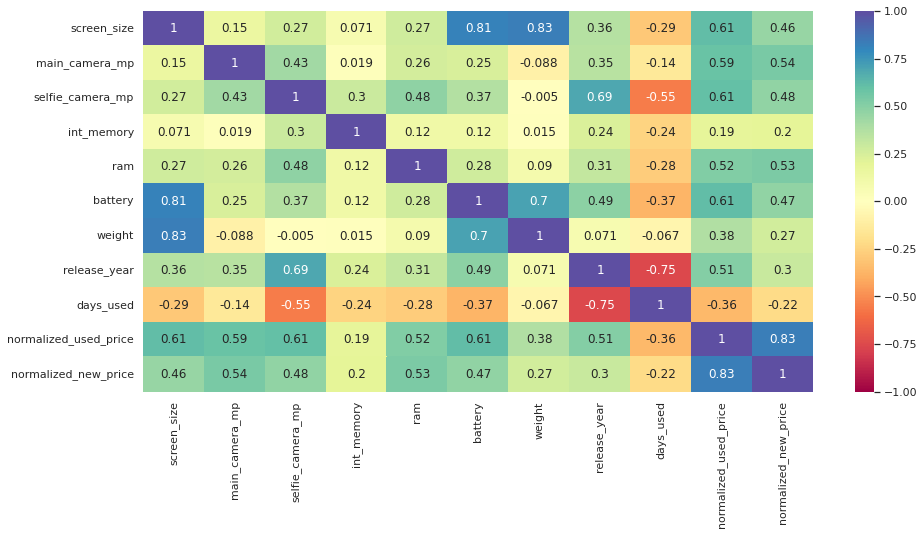

In [40]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, cmap="Spectral",vmin=-1, vmax= 1)
plt.show()

* The used price is correlated  with many attributes
* The used price is highly correlated with the price of new devices.
* The used price is correlated with the screen size, selfie camera and battery.
* The used price is negatively correlated with the days used, which makes sense as the phone when it becomes older the price decreases.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* Missing value treatment

In [42]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Let's create a copy of the dataframe.

In [43]:
df1= df.copy()

In [44]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

For the variables main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight we will impute the missing values in each column with the median grouped by release_year and brand_name as both the columns have skewed distributions.

In [45]:
cols_impute = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median"))

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

We will impute the remaining missing values main_camera_mp,selfie_camera_mp,battery and weight column with the median grouped by brand_name.

In [46]:
cols_impute = ["main_camera_mp","selfie_camera_mp","battery","weight"]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")) 

df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [47]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All the missing values have been treated.

* Feature engineering

Let's create a new feature years_since_release by taking the difference between release_year column and 2021 as we will consider the year of data collection, 2021, as the baseline.

We will drop the original column once the new feature is created as the year values themselves are not numerical in nature.

In [48]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  years_since_release    3454 non-null   int64  
dtypes: f

In [50]:
df1.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.617597,6.555067,54.528474,4.032620,3132.577446,182.636856,674.869716,4.364712,5.233107,5.034742
std,3.805280,4.749438,6.968440,84.934991,1.368598,1298.884193,88.360445,248.580166,0.588914,0.683637,2.298455
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,91.000000,1.536867,2.901422,1.000000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,533.500000,4.033931,4.790342,3.000000
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,690.500000,4.405133,5.245892,5.500000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,868.750000,4.755700,5.673718,7.000000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,1094.000000,6.619433,7.847841,8.000000


* Outlier detection 

Creating boxplots for numerical variables to check the outliers 

In [51]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

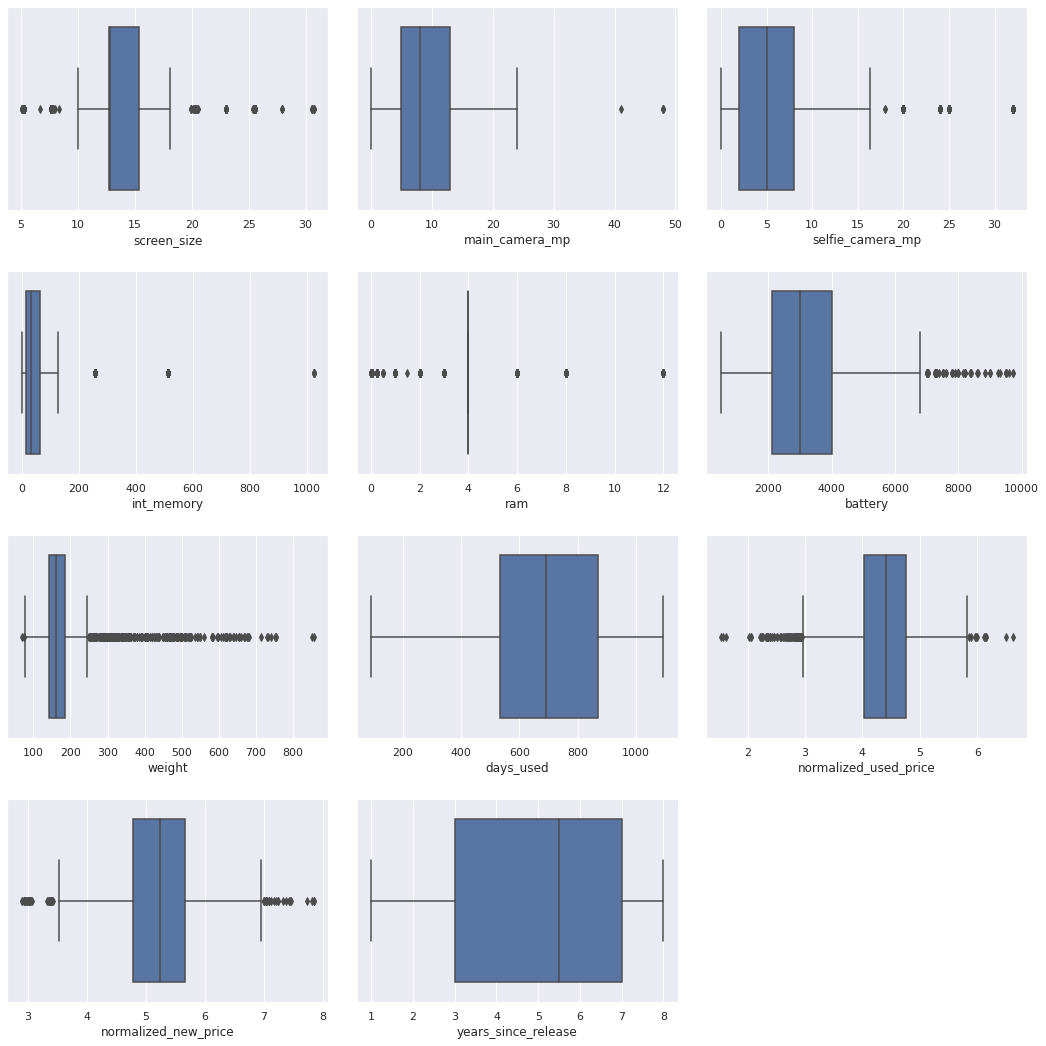

In [52]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are quite a few outliers in the data
* However, we will not treat them as they are proper values.

**Preparing data for modeling**

* We want to predict the price of used phone and tablets

* Before we proceed to build a model, we'll have to encode categorical features

* We'll split the data into train and test to be able to evaluate the model that we build on the train data

* We will build a Linear Regression model using the train data and then check it's performance

In [53]:
x = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(x.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

let's add the intercept to data

In [54]:
X = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


let's create dummy variables

In [55]:
X =pd.get_dummies(X,columns=X.select_dtypes(include=['object', 'category']).columns.tolist(),drop_first=True)

In [56]:
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


let's split the data in 70:30 ratio for train to test data

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [58]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

Univariate Analysis

As we did not treat the outliers because they are proper values ,So we will check the features that had missing values,the rest of the features won't be checked because it will remain the same.

let's check the univariate analysis of the attributes have been manipulated
* weight
* battery
* ram 
* int_memory 
* selfie_camera_mp 
* main_camera_mp






weight

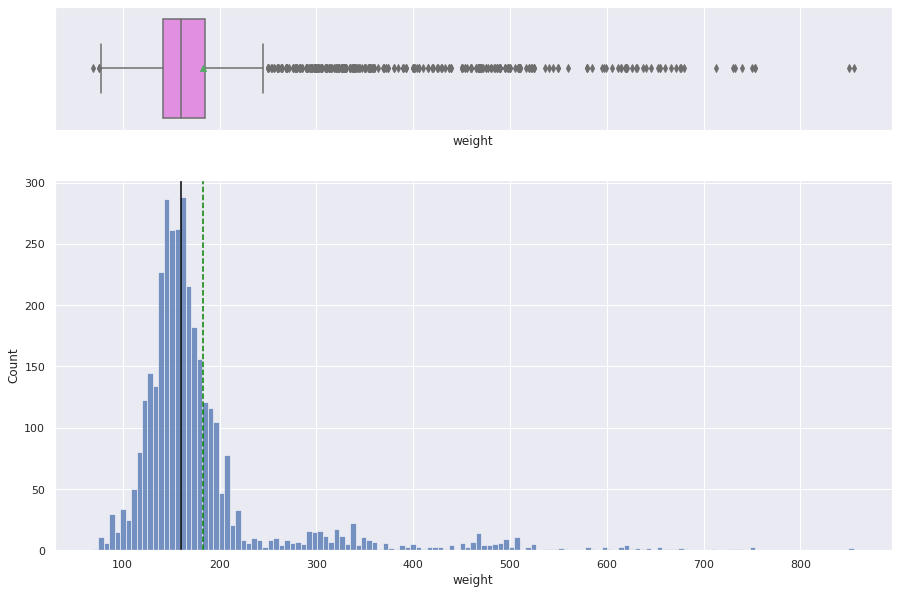

In [59]:
histogram_boxplot(df1, "weight")

* No changes happened after manipulating missing values from weight column.
* The weight distribution is right skewed , seems to have much outilers in the data.

battery

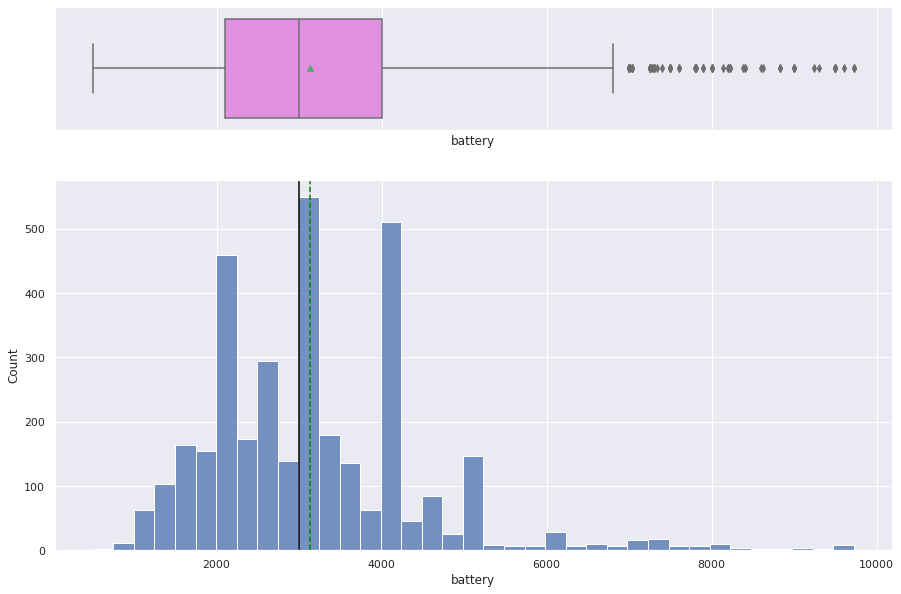

In [60]:
histogram_boxplot(df1, "battery")

* No changes happened after manipulating missing values from battery column.
* 75% of the devices have battery capacity less than 4000 mAh

ram

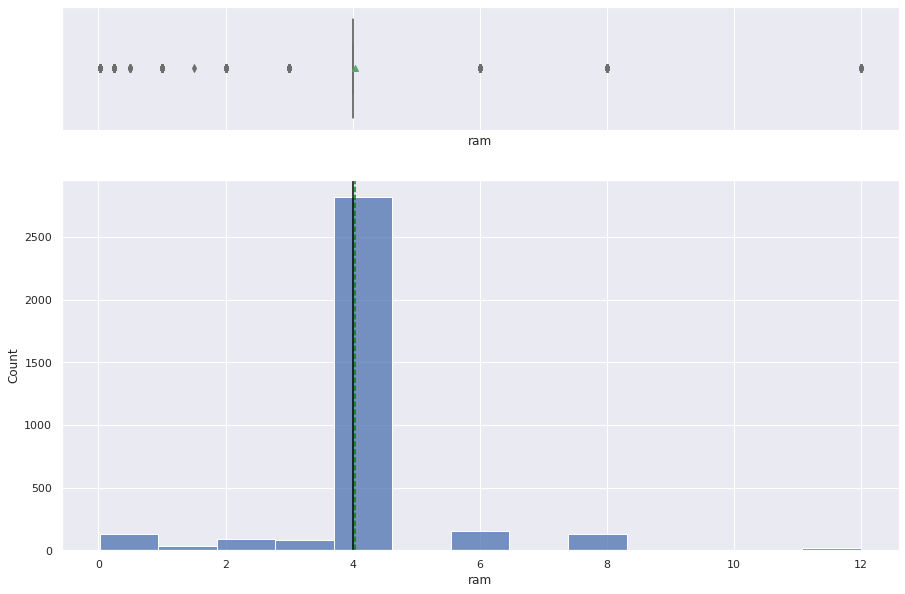

In [61]:
histogram_boxplot(df1, "ram")

* No changes happend after manipulating missing values from ram column.
* Ram distribution is away of normality , more than 2500 devices have 4GB ram

int_memory

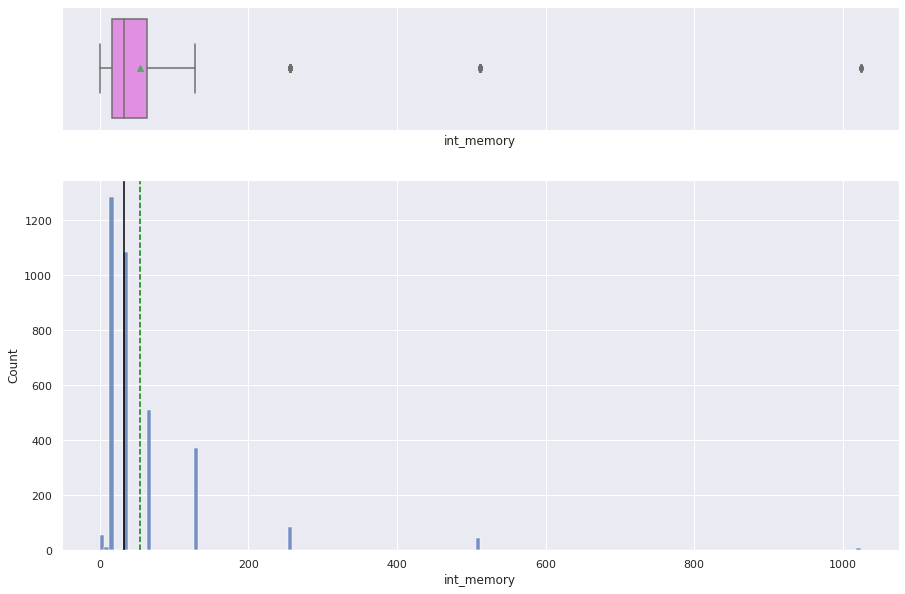

In [62]:
histogram_boxplot(df1, "int_memory")

* No changes happend after manipulating missing values from int_memory column.
* The distribution shows a mean internal memory of approximately 50 GB.



selfie_camera_mp

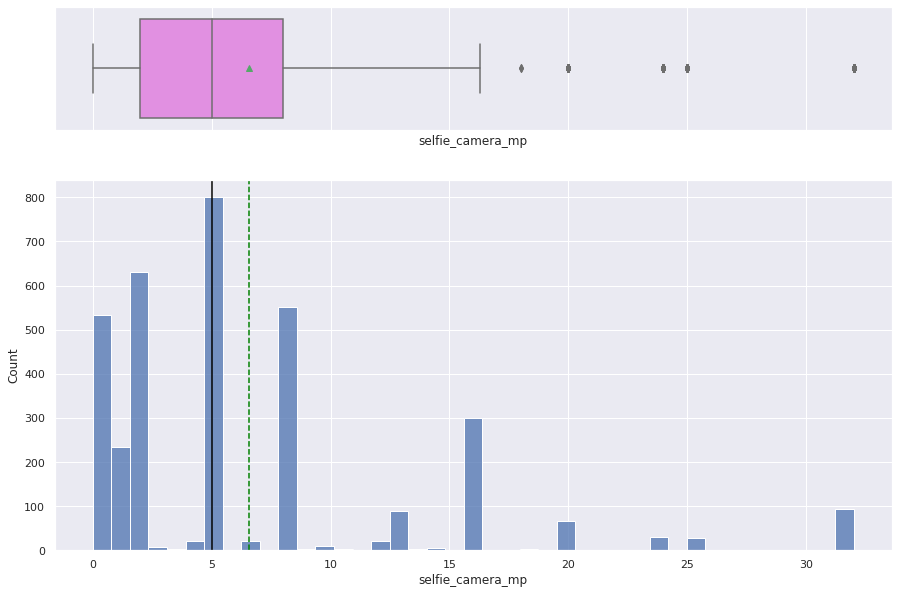

In [63]:
histogram_boxplot(df1, "selfie_camera_mp")

* No changes happend after manipulating missing values from selfie camera mp column.
* The distribution shows a variety of selfie camera resolution ,however 50% of the devices are less than 5MP.

main_camera_mp

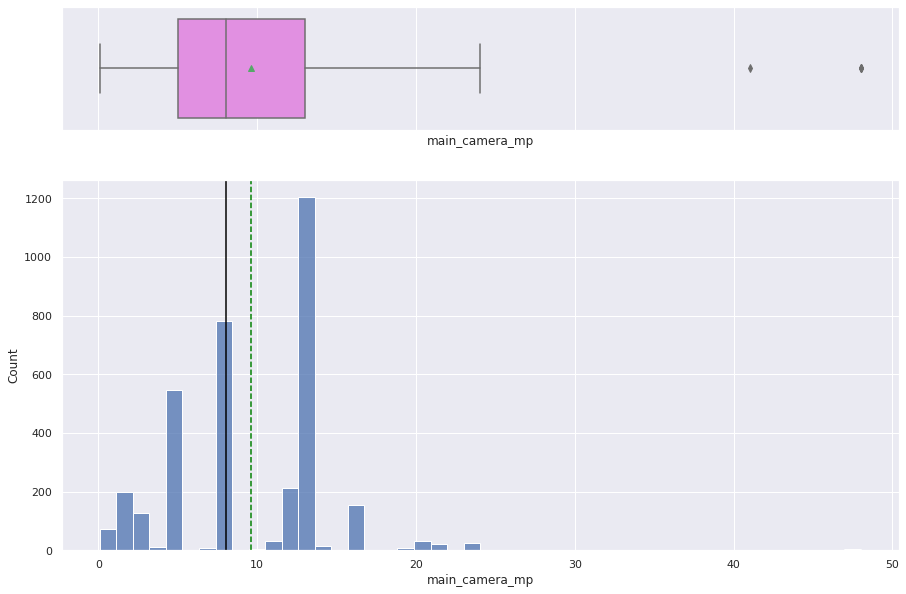

In [64]:
histogram_boxplot(df1, 'main_camera_mp')

* No changes happend after manipulating missing values from main camera mp column.
* The distribution shows a variety of main camera resolution ,however 50% of the devices are less than 10MP.

How does the price of used devices varies since released?

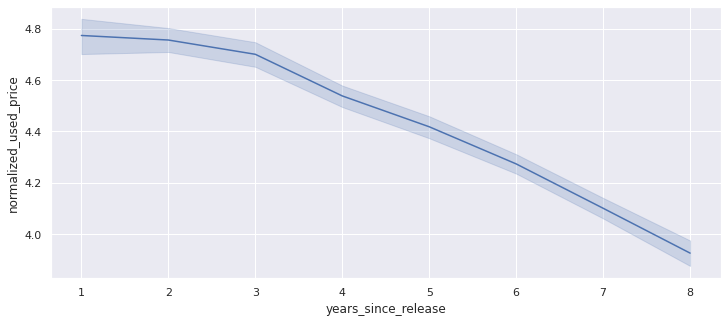

In [65]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df1,x='years_since_release',y='normalized_used_price') 
plt.show()

* Feature engineering helped us to show how the prices decreased when the devices became older.

## Model Building - Linear Regression

In [66]:
model = sm.OLS(y_train,x_train)

In [67]:
olsmodel1=model.fit()

In [68]:
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                           13:29:24   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3156      0.071     18.454      0.000       1.176       1.455
screen_size               0.0244      0.003      7.163      0.000       0.018       0.031
main_camera_mp            0.0208      0.002     13.848      0.000       0.018       0.024
selfie_camera_mp          0.0135      0.001     11.997      0.000       0.011       0.016
int_memory                0.0001   6.97e-05      1.651      0.099   -2.16e-05       0.000
ram                       0.0230      0.005      4.451      0.000       0.013       0.033
battery               -1.689e-05   7.27e-06     -2.321      0.020   -3.12e-05   -2.62e-06
weight                    0.0010      0.000      7.480      0.000       0.001       0.001
days_used              4.216e-05   3.09e-05      1.366      0.172   -1.84e-05       0.000
normalized_new_price      0.4311      0.012     35.147      0.000       0.407       0.455
years_since_release      -0.0237      0.005     -5.193      0.000      -0.033      -0.015
brand_name_Alcatel        0.0154      0.048      0.323      0.747      -0.078       0.109
brand_name_Apple         -0.0038      0.147     -0.026      0.980      -0.292       0.285
brand_name_Asus           0.0151      0.048      0.314      0.753      -0.079       0.109
brand_name_BlackBerry    -0.0300      0.070     -0.427      0.669      -0.168       0.108
brand_name_Celkon        -0.0468      0.066     -0.707      0.480      -0.177       0.083
brand_name_Coolpad        0.0209      0.073      0.287      0.774      -0.122       0.164
brand_name_Gionee         0.0448      0.058      0.775      0.438      -0.068       0.158
brand_name_Google        -0.0326      0.085     -0.385      0.700      -0.199       0.133
brand_name_HTC           -0.0130      0.048     -0.270      0.787      -0.108       0.081
brand_name_Honor          0.0317      0.049      0.644      0.520      -0.065       0.128
brand_name_Huawei        -0.0020      0.044     -0.046      0.964      -0.089       0.085
brand_name_Infinix        0.1633      0.093      1.752      0.080      -0.019       0.346
brand_name_Karbonn        0.0943      0.067      1.405      0.160      -0.037       0.226
brand_name_LG            -0.0132      0.045     -0.291      0.771      -0.102       0.076
brand_name_Lava           0.0332      0.062      0.533      0.594      -0.089       0.155
brand_name_Lenovo         0.0454      0.045      1.004      0.316      -0.043       0.134
brand_name_Meizu         -0.0129      0.056     -0.230      0.818      -0.123       0.097
brand_name_Micromax      -0.0337      0.048     -0.704      0.481      -0.128       0.060
brand_name_Microsoft      0.0952      0.088      1.078      0.281      -0.078       0.268
brand_name_Motorola      -0.0112      0.050     -0.226      0.821      -0.109   

## Model Performance Check

Let's check the performance of the model using different metrics.

  * We will be using metric functions defined in sklearn for RMSE, MAE, and R2.

  * We will define a function to calculate MAPE and adjusted R2.

In [69]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

Checking model performance on train set (seen 70% data)

In [70]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


Checking model performance on test set (seen 30% data)

In [71]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

* The training R2 is 0.84, so the model is not underfitting

* The train and test RMSE and MAE are comparable, so the model is not overfitting either

* MAE suggests that the model can predict the used price of phones/tablets within a mean error of 0.18 on the test data

* MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the price of used phone/tablets.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

* No Multicollinearity

* Linearity of variables

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

**TEST FOR MULTICOLLINEARITY**

**General Rule of thumb:**

* If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables.

* If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.

* If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [73]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* We will systematically drop numerical columns with VIF > 5

* We will ignore the VIF values for dummy variables and the constant (intercept)

**Removing Multicollinearity**

**To remove multicollinearity**

1- Drop every column one by one that has a VIF score greater than 5.

2- Look at the adjusted R-squared and RMSE of all these models.

3- Drop the variable that makes the least change in adjusted R-squared.

4- Check the VIF scores again.

5- Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [74]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [75]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


we will drop screen size column

In [76]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [77]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                           13:29:26   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

* We can see that adj. R-squared has dropped from 0.842 to  0.838, which shows that the dropped columns did not have much effect on the model.
* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

**Dealing with high p-value variables**

* Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
But sometimes p-values change after dropping a variable.
* So, we'll not drop all variables at once
* Instead, we will do the following:

   * Build a model, check the p-values of the variables, and drop the column with the highest p-value

  * Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value

  * Repeat the above two steps till there are no columns with p-value > 0.05

In [78]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [79]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [80]:
olsmod3 = sm.OLS(y_train, x_train3).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                           13:29:26   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

checking model performance on train set (seen 70% data)

In [81]:
print("Training Performance\n")
olsmod3_train_perf = model_performance_regression(olsmod3, x_train3, y_train)
olsmod3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


checking model performance on test set (seen 30% data)

In [82]:
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsmod3, x_test3, y_test)
olsmod3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and *olsmod3* as the final model to move forward with

* Now adjusted R-squared is 0.836, i.e., our model is able to explain ~84% of the variance

* The adjusted R-squared in *olsmod2* (where we considered the variables without multicollinearity) was 0.838

   * This shows that the variables we dropped were not affecting the model

* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

Now we'll check the rest of the assumptions on olsmod3.

* Linearity of variables

* Independence of error terms

* Normality of error terms

* No Heteroscedasticity

**TEST FOR LINEARITY AND INDEPENDENCE**

* Make a plot of fitted values vs residuals.
* If they don't follow any pattern, then we say the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [83]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


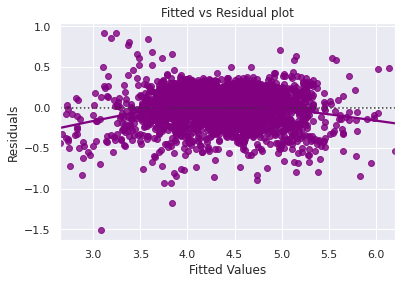

In [84]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

**TEST FOR NORMALITY**

* We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
*If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
*If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

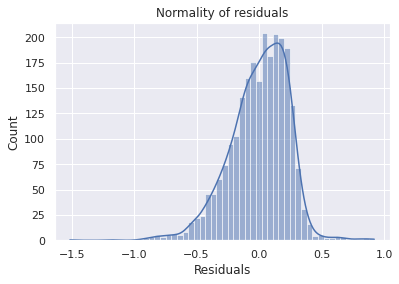

In [85]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does have a bell shape.
* Let's check the Q-Q plot.

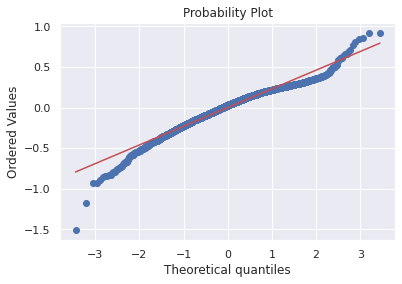

In [86]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line except for the tails.
* Let's check the results of the Shapiro-Wilk test.

In [87]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied.

**TEST FOR HOMOSCEDASTICITY**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
  * Null hypothesis: Residuals are homoscedastic
  * Alternate hypothesis: Residuals have heteroscedasticity

In [88]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

* Since p-value > 0.05, we can say that the residuals are homoscedastic. 

* So, this assumption is satisfied.

**Predictions on test data**

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction

Predictions on the test set

In [89]:
pred = olsmod3.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [90]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [91]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                           13:29:28   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Checking model performance on train set (seen 70% data)

In [92]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


Checking model performance on test set (seen 30% data)

In [93]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* The model is able to explain ~84% of the variation in the data.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within ~4.6% of the price of the used phone/tablets.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations 

- The model is able to explain ~84% of the variation in the data and within 4.6% of the price of the used phone/tablet on the test data, which is good

   * This indicates that the model is good for prediction as well as inference purposes

- If the resolution(MP) of main camera of phone/tablet increases by one unit, then its used price increases by 0.0210 units, all other variables held constant.
  * Rear cameras generally have a better resolution than front cameras,
ReCell can focus on Sony devices as they have 39% of devices that have great main camera resolution higher than 16 MP.

- If the resolution(MP) of selfie camera of phone/tablet increases by one unit, then its used price increases by 0.0138 units, all other variables held constant
   *  A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones.
ReCell can invest in Huawei, Vivo and Oppo as they present a great amount of devices that offer selfie camera greater than 8 MP.

- If the RAM of the phone/tablet increases by one unit, then its used price increases by 0.0207 units, all other variables held constant
   * The amount of RAM is important for the smooth functioning of a device.
ReCell can can look to increase the number of some brands like Nokia,one plus,oppo and realme that have a variety of devices with different ram capacity.

* If the weight of phone/tablet increases by one unit, then its used price increases by 0.0017 units, all other variables held constant.

- If the price of the new phone/tablet increases by one unit, then its used price increases by 0.4415 units, all other variables held constant.

- If the years since the phone/tablet are released increases by one unit, then its used price decreases by 0.0292 units, all other variables held constant
   * which makes sense that when the phone becomes older its price decreases.Advising ReCell to focus on the devices with less years difference.

* The used prices are affected by the devices offering 4G and 5G networks,the analysis shows that devices covering 5G network are more expensive than devices covering 4G network.

___